# **Sử dụng thuật toán k-Means để giảm số màu trong ảnh từ đó giảm kích thước file ảnh theo ý muốn.**

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

Huỳnh Thị Trúc Lam - 6351071040


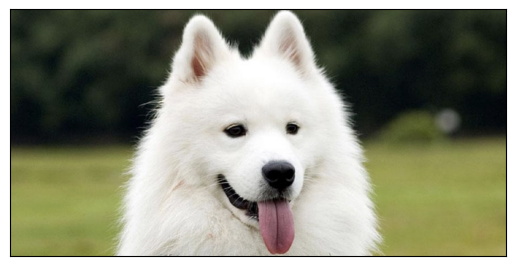

In [3]:
image = Image.open('dog.png')
axes = plt.axes(xticks=[], yticks=[])
axes.imshow(image)
print("Huỳnh Thị Trúc Lam - 6351071040")

In [6]:
image_array = np.array(image)
height, width, _ = image_array.shape
print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Chiều rộng của ảnh: {width}")
print(f"Chiều cao của ảnh: {height}")
print(f"Kích thước mảng ảnh: {image_array.shape}")

Huỳnh Thị Trúc Lam - 6351071040
Chiều rộng của ảnh: 1078
Chiều cao của ảnh: 536
Kích thước mảng ảnh: (536, 1078, 4)


In [15]:
data = image_array / 255.0
print("Huỳnh Thị Trúc Lam - 6351071040")
print("Giá trị pixel sau khi chuẩn hóa (5 pixel đầu tiên):\n", data.flatten()[:5])

Huỳnh Thị Trúc Lam - 6351071040
Giá trị pixel sau khi chuẩn hóa (5 pixel đầu tiên):
 [0.20392157 0.23921569 0.15686275 1.         0.2       ]


In [14]:
data = data.reshape((height * width, -1))
data.shape


(577808, 4)

In [19]:
kmeans=KMeans(n_clusters=32, max_iter=300)

# Reshape data to 2D as KMeans expects
data = data.reshape((height * width, -1))

kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

img_recolored = new_colors.reshape(image_array.shape)

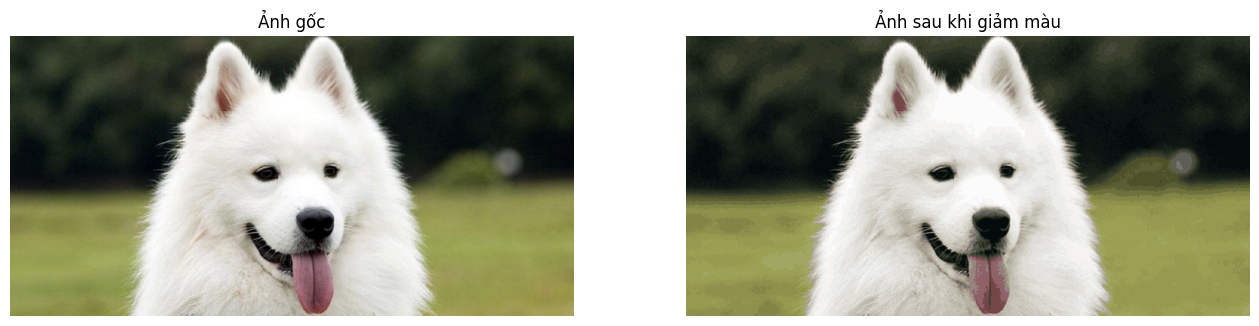

Huỳnh Thị Trúc Lam - 6351071040


In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(image)
ax[0].set_title('Ảnh gốc')
ax[0].axis('off')

# Convert back to uint8 for display
img_recolored_uint8 = (img_recolored * 255).astype(np.uint8)
ax[1].imshow(img_recolored_uint8)
ax[1].set_title('Ảnh sau khi giảm màu')
ax[1].axis('off')

plt.show()
print("Huỳnh Thị Trúc Lam - 6351071040")

In [21]:
from PIL import Image

# Convert the numpy array back to a PIL Image
output_image = Image.fromarray(img_recolored_uint8)

# Save the image
output_image.save('recolored_image.png')

print("Ảnh đã giảm màu đã được lưu thành 'recolored_image.png'")
print("Huỳnh Thị Trúc Lam - 6351071040")

Ảnh đã giảm màu đã được lưu thành 'recolored_image.png'
Huỳnh Thị Trúc Lam - 6351071040
